In [40]:
from langchain_openai import ChatOpenAI
import os
from dotenv import load_dotenv

# Load API Key
load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")

# Initialize the language model
llm = ChatOpenAI(openai_api_key=api_key, max_tokens=100, temperature=0.7)

In [41]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a CPTSD Therapist with 20 plus years experience in healing people from CPTSD."),
    ("user", "{input}"),
    
])

chain = prompt | llm


In [42]:
from langchain_core.output_parsers import StrOutputParser

output_parser = StrOutputParser()
chain = chain | output_parser


In [43]:
import pdfplumber

# Function to read and update the current page number
def get_and_update_current_page(file_path, increment=2):
    try:
        with open(file_path, 'r') as file:
            current_page = int(file.read().strip())
    except FileNotFoundError:
        current_page = 0  # Default starting page if file not found

    new_current_page = current_page + increment

    with open(file_path, 'w') as file:
        file.write(str(new_current_page))

    return current_page, new_current_page

# Function to extract text from a specific section of the PDF
def extract_section_from_pdf(pdf_path, start_page, end_page):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        pages = pdf.pages[start_page:end_page]
        for page in pages:
            text += page.extract_text() + "\n"
    return text

# File to store current page number
current_page_file = 'current_page.txt'

# Get the current page and update it for the next run
start_page, next_start_page = get_and_update_current_page(current_page_file)


# Extract text from today's section
pdf_text = extract_section_from_pdf("CPTSD.pdf", start_page, next_start_page)

# Invoke the chain with your query
response = chain.invoke({"input": "write a 20 words inspirational quote for a person suffering from cptsd that would heal them, from the following text" + pdf_text})

# Print the response
print(response)
#print(pdf_text)

quote=response

"Through grieving and verbal ventilation, you can release pain, reconnect with your emotions, and make choices aligned with your true self."


In [44]:
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain_community.utilities.dalle_image_generator import DallEAPIWrapper
from langchain_openai import OpenAI

quote= response
print(quote)
llm = OpenAI(temperature=0.9)


# Define the prompt template with the correct input variable
prompt_template = PromptTemplate(
    input_variables=["quote"],  # Correctly named input variable
    template="Create an inspiring, hopeful, and positive image without including any text in the image: {quote}",
)

# Create a chain with the LLM and the prompt template
chain = LLMChain(llm=llm, prompt=prompt_template)



# Create a dictionary with the quote variable
input_data = {"quote": quote}

# Generate the prompt using the chain
prompt = chain.run(input_data)
print(prompt)

len(prompt)
max_length = 1000
if len(prompt) >= max_length:
    prompt = prompt[:max_length]

print(len(prompt))
# Generate the image URL using DallEAPIWrapper with the prompt
image_url = DallEAPIWrapper().run(prompt)

print(image_url)


"Through grieving and verbal ventilation, you can release pain, reconnect with your emotions, and make choices aligned with your true self."


The image depicts a person standing in a vast field, their arms stretched out wide and head tilted towards the sky. The sun is setting in the background, illuminating the person in a warm, golden light. In front of them, a small storm cloud can be seen, with rain pouring down from it. But the person's face is serene and peaceful, with a slight smile on their lips. The raindrops seem to be washing away their pain and sorrow, and as they close their eyes and take a deep breath, it is as if they are releasing all of their emotions into the storm. The storm itself seems to be responding to the person's release, with bursts of light and color emerging from it. And in that moment, it is clear that the person is reconnecting with their true self and finding hope and positivity in the midst of their grieving. 
815
https://oaidalleapiprodscus.blob.core.w

In [45]:
print(quote)

"Through grieving and verbal ventilation, you can release pain, reconnect with your emotions, and make choices aligned with your true self."


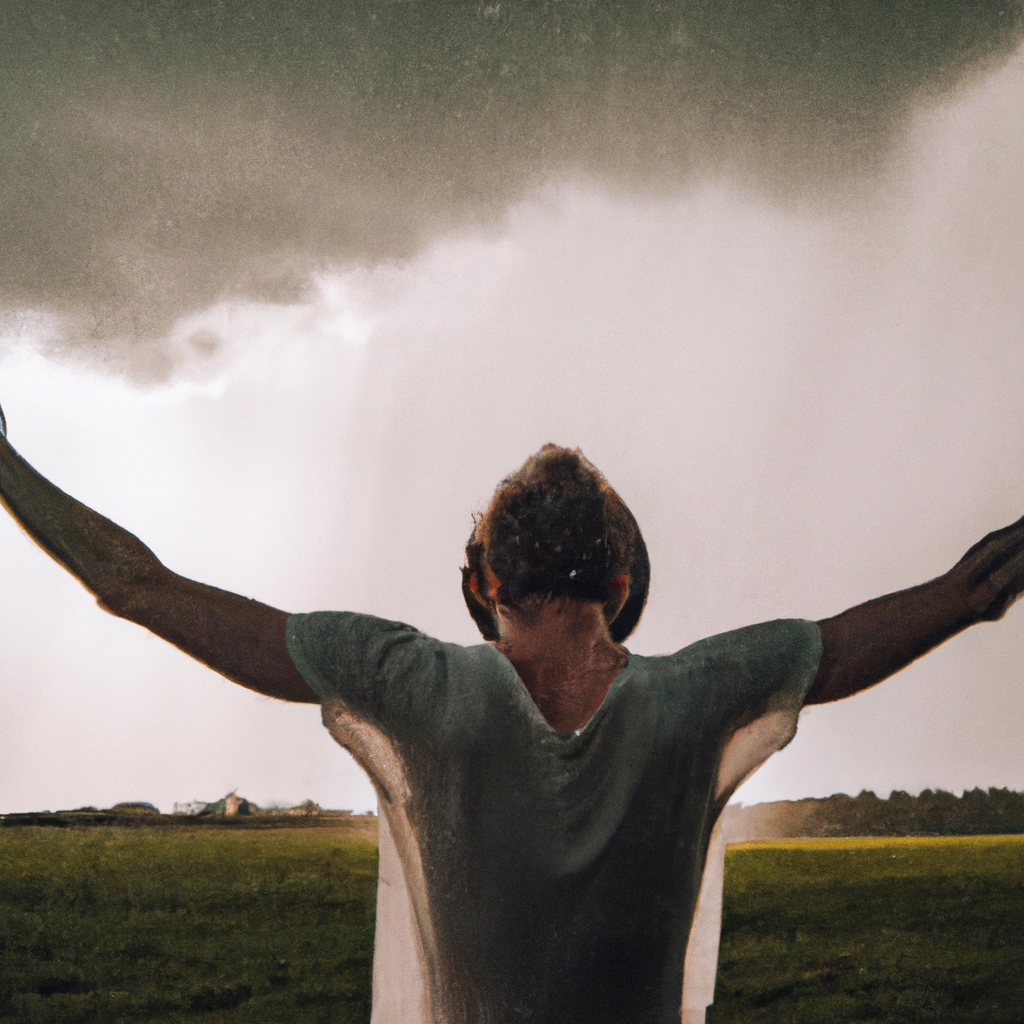

In [46]:
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display
import datetime


response = requests.get(image_url)
image_data = BytesIO(response.content)
image = Image.open(image_data)

display(image)

# Generate a unique filename with the current date and time
current_time = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"image_{current_time}.jpg"  # The file will be saved with a .jpg extension

# Save the image in the current directory with the generated filename
image.save(filename)



In [47]:
print(prompt)



The image depicts a person standing in a vast field, their arms stretched out wide and head tilted towards the sky. The sun is setting in the background, illuminating the person in a warm, golden light. In front of them, a small storm cloud can be seen, with rain pouring down from it. But the person's face is serene and peaceful, with a slight smile on their lips. The raindrops seem to be washing away their pain and sorrow, and as they close their eyes and take a deep breath, it is as if they are releasing all of their emotions into the storm. The storm itself seems to be responding to the person's release, with bursts of light and color emerging from it. And in that moment, it is clear that the person is reconnecting with their true self and finding hope and positivity in the midst of their grieving. 


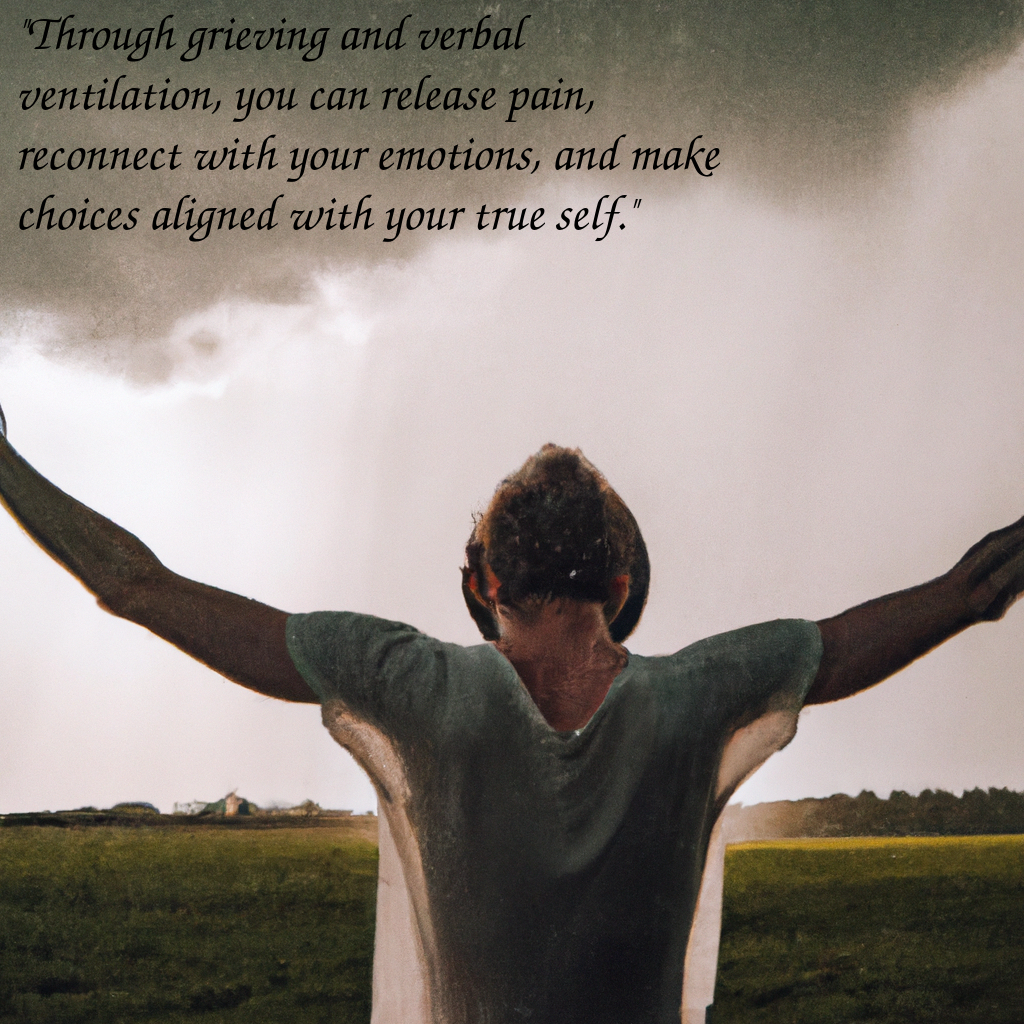

In [48]:
from PIL import Image, ImageDraw, ImageFont
import textwrap


def draw_multiline_text(image, text, position, font, text_color, line_spacing=1.2):
    draw = ImageDraw.Draw(image)
    lines = textwrap.wrap(text, width=40)  # Adjust 'width' as needed

    x, y = position
    line_height = int(font.size * line_spacing)  # Calculate line height based on font size and line spacing

    for line in lines:
        draw.text((x, y), line, font=font, fill=text_color)
        y += line_height  # Increment y position by line height


# Load the font
font_path = 'fonts/Z003-MediumItalic.otf'
my_font = ImageFont.truetype(font_path, 50)


# Use the function
draw_multiline_text(image, quote, (15, 15), my_font, (0, 0, 0))

# Display the image
display(image)

# Optionally, save the image
# image.save('output_with_text.png')
# Generate a unique filename with the current date and time




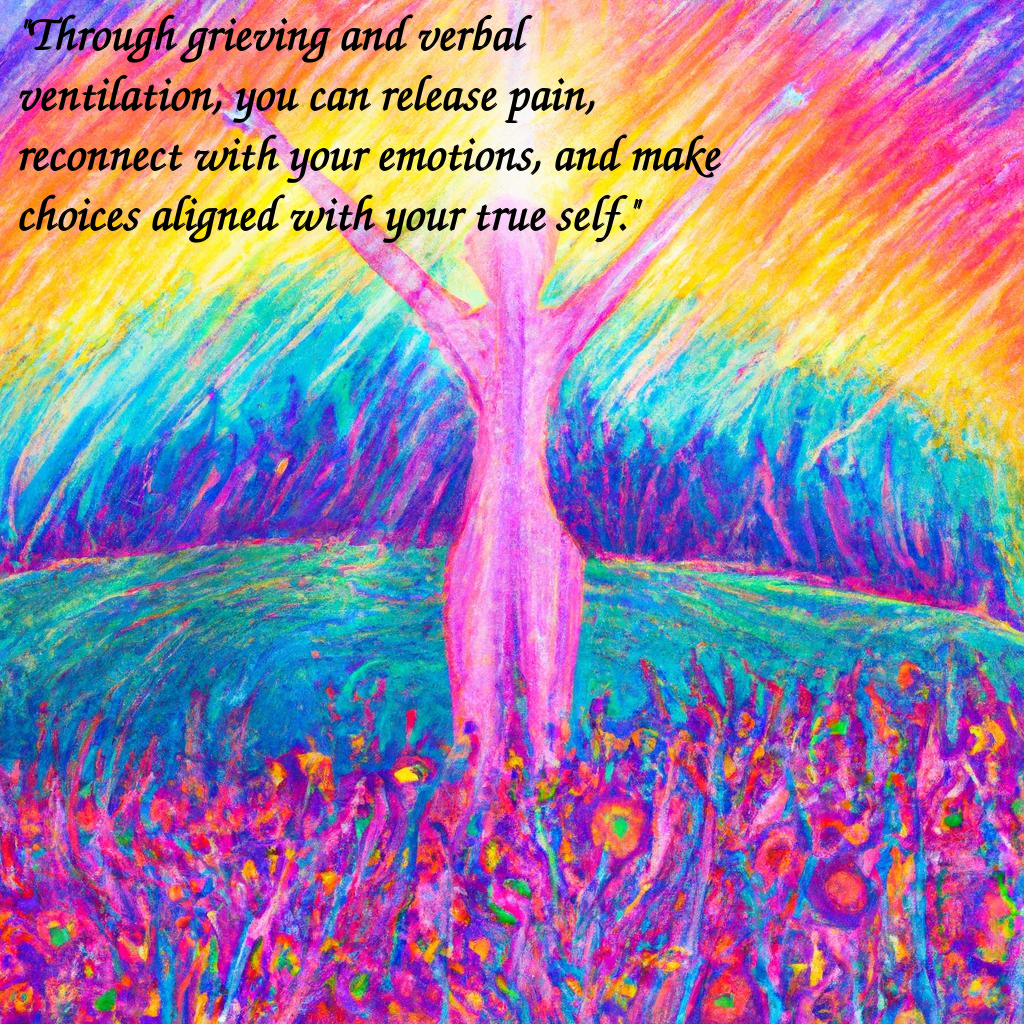

In [49]:
from PIL import Image, ImageDraw, ImageFont
import textwrap

image_path = '/home/agentx/Desktop/Social_media_project/image_20240127_214014.jpg'
image = Image.open(image_path)

def draw_multiline_text_with_shadow(image, text, position, font, text_color, shadow_color, shadow_offset, line_spacing=1.2):
    draw = ImageDraw.Draw(image)
    lines = textwrap.wrap(text, width=40)  # Adjust 'width' as needed

    x, y = position
    shadow_x, shadow_y = shadow_offset
    line_height = int(font.size * line_spacing)  # Calculate line height based on font size and line spacing

    for line in lines:
        # Draw shadow
        draw.text((x + shadow_x, y + shadow_y), line, font=font, fill=shadow_color)
        
        # Draw text
        draw.text((x, y), line, font=font, fill=text_color)
        y += line_height  # Increment y position by line height

# Load the font
font_path = 'fonts/Z003-MediumItalic.otf'
my_font = ImageFont.truetype(font_path, 50)

# Shadow settings
shadow_color = "black"  # Gray shadow
shadow_offset = (1, 1)  # Offset for shadow

# Use the function with shadow
draw_multiline_text_with_shadow(image, quote, (15, 15), my_font, 'black', shadow_color, shadow_offset)

# Display the image
display(image)
